In [20]:
from  langchain_openai import ChatOpenAI
import os 
from dotenv import load_dotenv

# This function will load all the variables from the .env file and will 
# make them available in the os.environ dictionary (env variables)
load_dotenv() 

if os.environ.get("OPENAI_API_KEY"):
    print("Bro API KEY Variable exists")
else:
    raise ValueError("OPENAI_API_KEY not found")

from langchain_core.messages import HumanMessage, SystemMessage, AIMessage
from  langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser, PydanticOutputParser

llm_openai = ChatOpenAI(model="gpt-5-mini",temperature=0)

Bro API KEY Variable exists


# **Tools**

In [13]:
# TOOL - 1 [News Search Tool]

from langchain_community.tools import DuckDuckGoSearchRun

search_tool = DuckDuckGoSearchRun(description="This is a tool to search the web for news")


# TOOL - 2 [Wikipedia Search Tool]

from langchain_community.tools import WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper

wikipedia_tool = WikipediaQueryRun(api_wrapper=WikipediaAPIWrapper(),description="This is a tool to search Wikipedia")


# TOOL - 3 [Custom Enterprise Tool]

from langchain.tools import tool

@tool
def enterprise_tool(query:str)-> str:

    """This is a tool to send emails to employees"""
    
    return "Email Sent"

In [17]:
ToolKit = [search_tool, wikipedia_tool, enterprise_tool]
ToolKit

[DuckDuckGoSearchRun(description='This is a tool to search the web for news', api_wrapper=DuckDuckGoSearchAPIWrapper(region='wt-wt', safesearch='moderate', time='y', max_results=5, backend='auto', source='text')),
 WikipediaQueryRun(description='This is a tool to search Wikipedia', api_wrapper=WikipediaAPIWrapper(wiki_client=<module 'wikipedia' from 'c:\\Langchain_Tutorial\\.venv\\Lib\\site-packages\\wikipedia\\__init__.py'>, top_k_results=3, lang='en', load_all_available_meta=False, doc_content_chars_max=4000)),
 StructuredTool(name='enterprise_tool', description='This is a tool to send emails to employees', args_schema=<class 'langchain_core.utils.pydantic.enterprise_tool'>, func=<function enterprise_tool at 0x000001AB58710860>)]

# **ReAct Agent**

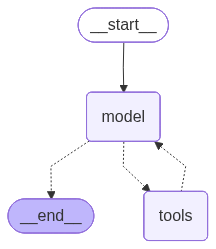

In [21]:
from langchain.agents import create_agent
from langchain_openai import ChatOpenAI

model = ChatOpenAI(
    model="gpt-5-mini",
    temperature=0.1,
    max_tokens=1000,
    timeout=30
)
agent = create_agent(model, tools=ToolKit)
agent

# **ReAct Agent Invoke With Streams**

In [23]:
example_query = "Give me the latest news about the stock market"

events = agent.stream(
    {"messages": [("user", example_query)]},
    stream_mode="values",
)
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

Give me the latest news about the stock market
================================== Ai Message ==================================
Tool Calls:
  duckduckgo_search (call_kyd2fqXHVUIQsBnzHGu0QN4m)
 Call ID: call_kyd2fqXHVUIQsBnzHGu0QN4m
  Args:
    query: stock market news January 8 2026 US S&P 500 Dow Nasdaq latest
================================= Tool Message =================================
Name: duckduckgo_search

Markets are on alert for any sign that the US has joined the Middle East conflict, which has swung stocks around since it broke out last week. Stock market today: Dow , S&P 500 , Nasdaq futures jump as court blocks Trump tariffs, Nvidia earnings impress ... market reaction was non-existent ... ... a genuine recovery, or just a temporary reprieve? Let's dive into the latest updates from November 24th and unpack what's driving the market 's mood. Follow live updates on the stock market today as D

# **Manually Binding The LLM With Tools**

In [25]:
# Without Binding
llm_openai.invoke("What's the latest news about the stock market?")

AIMessage(content='I can’t fetch live news or real‑time quotes (my training data goes to June 2024), so I can’t give a current market snapshot for today. I can, however, help you get the latest market news right now or give a concise, up‑to‑date (to June 2024) summary of major market themes and how to interpret new headlines. Which would you prefer?\n\nIf you want the latest immediately, here are quick ways to get it and what to check:\n\n1) Fast places to see a market snapshot (real‑time or near real‑time)\n- Google: search “S&P 500” / “Dow” / “Nasdaq” / or a ticker.\n- Yahoo Finance, MSN Money, CNBC Markets, MarketWatch, Investing.com, TradingView.\n- For headlines: Reuters Markets, Bloomberg Markets, WSJ Markets, CNBC.\n\n2) Key things to look at on a snapshot page\n- Index moves: S&P 500, Dow, Nasdaq (and percent change).\n- Volatility: VIX.\n- Treasury yields: 2‑yr and 10‑yr (moves in yields drive risk assets).\n- Major sectors: tech, financials, energy, etc., to see which are lea

In [27]:
# With Binding
llm_binded = llm_openai.bind_tools(ToolKit)
llm_binded.invoke("What's the latest news about the stock market?")

AIMessage(content='', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 344, 'prompt_tokens': 200, 'total_tokens': 544, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 256, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-5-mini-2025-08-07', 'system_fingerprint': None, 'id': 'chatcmpl-CvqiL7oAHH8WIFfmMDPORpkHB9OPH', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='lc_run--019b9f40-8721-7ef3-9028-1e6ade99e114-0', tool_calls=[{'name': 'duckduckgo_search', 'args': {'query': 'stock market news today'}, 'id': 'call_z8dyLPcPPQ7Phm5k6VHwj9VX', 'type': 'tool_call'}, {'name': 'duckduckgo_search', 'args': {'query': 'S&P 500 today'}, 'id': 'call_CIbZNHHr29WRCyBEntyZNlWs', 'type': 'tool_call'}, {'name': 'duckduckgo_search', 'args': {'query': 'Dow Jones Industrial Average ne